# Comparing Wink Sinkhole with the mathematical functions
@author: Max Felius

## Roadmap
- Import Packages
- Load needed data
- import defined functions that are used
- Do the analysis for one displacement time series
- Create error metrics table
- save data?

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re, datetime
import os, sys, time
from tqdm import tqdm

# personal package for sinkhole comparison
sys.path.extend(os.path.join(os.getcwd(),'package'))
import package.geometric_models as gmodel
import package.physical_models as pmodel
# from package.inverse_kinematic_model import inverse_kinematic_model
from package.sinkhole_data_loader import sinkhole_data_loader

#stochastic scripts
from package.stochastic_center_determination import center_determination as stochastic_center_determination
from package.stochastic_inverse_lsq import inverse_kinematic_model as stochastic_inverse_kinematic_model

#Beyer scripts
from package.beyer_center_determination import center_determination as beyer_center_determination
from package.beyer_inverse_lsq import inverse_kinematic_model as beyer_inverse_kinematic_model

#sanns scripts
from package.sanns_center_determination import center_determination as sanns_center_determination
from package.sanns_inverse_lsq import inverse_kinematic_model as sanns_inverse_kinematic_model

#geometric models
from package.geometric_models import gaussian
from package.geometric_models import beyer
from package.geometric_models import sann

#physical model
from package.physical_models import mogi
from package.physical_models import least_squares_mogi

#bals' geometric model
from package.balls_lsq import inverse_kinematic_model
from package.balls_lsq import zg as bals_zg
from package.balls_lsq import center_determination

data_folder = 'Wink2016'

start_date = '20150421'
start_date_datetime = datetime.datetime.strptime(start_date,'%Y%m%d')
date_list = []
delta_days = []
data_list = []

for date in sorted(os.listdir(data_folder)):
    if date.endswith('.csv'):
        #get the date from the title
        m = re.search(r'\d{8}',date)
        date_conv = datetime.datetime.strptime(m.group(0),'%Y%m%d')
        date_list.append(date_conv)

        #Determine the number of days since the start date
        delta_days.append((date_conv-start_date_datetime).days)

        #Read the data from the files
        data_list.append(pd.read_csv(os.path.join(data_folder,date),header=None))

#extract and combine x and z coordinates and define t
x = np.array([])
y = np.array([])
t = np.array([])
nitems = 0
for idx,item in enumerate(data_list):
    nitems += 1
    n = len(item)
    t = np.concatenate((t,[delta_days[idx]]*n))
    x = np.concatenate((x,item[0].values))
    y = np.concatenate((y,item[1].values))

#from cm to meter
y = y/100

In [2]:
# Global variables
x_data_list = data_list[0][0].values
x0_array = np.linspace(x_data_list[10],x_data_list[-10],100)
v_in = 1000
R_in = 470

# Determine stochastic function center
#center determination based on the RMSE
stochastic_center = stochastic_center_determination(t,x,y,x0_array,data_list,delta_days,nitems,1000,470)
    
#define r
stochastic_x0 = x0_array[np.where(min(stochastic_center)==stochastic_center)[0]]
stochastic_r = np.sqrt((x-stochastic_x0)**2)

#estimate v and R
stochastic_gv, stochastic_gR = stochastic_inverse_kinematic_model(v_in,t,R_in,stochastic_r,y)

# Determine Beyer function center
#center determination based on the RMSE
beyer_center = beyer_center_determination(t,x,y,x0_array,data_list,delta_days,nitems,1000,470)
    
#define r
beyer_x0 = x0_array[np.where(min(beyer_center)==beyer_center)[0]]
beyer_r = np.sqrt((x-beyer_x0)**2)

#estimate v and R
beyer_gv, beyer_gR = beyer_inverse_kinematic_model(v_in,t,R_in,beyer_r,y)

# Determine sanns function center
#center determination based on the RMSE
sanns_center = sanns_center_determination(t,x,y,x0_array,data_list,delta_days,nitems,1000,470)
    
#define r
sanns_x0 = x0_array[np.where(np.nanmin(sanns_center)==sanns_center)[0]]
sanns_r = np.sqrt((x-sanns_x0)**2)

#estimate v and R
sanns_gv, sanns_gR = sanns_inverse_kinematic_model(v_in,t,R_in,sanns_r,y)

Determining Center Position:  67%|██████▋   | 67/100 [00:24<00:23,  1.43it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00017354487840409635 and R=2175.6848396892638.


Determining Center Position:  69%|██████▉   | 69/100 [00:25<00:26,  1.19it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00017063575799162317 and R=2607.1739492309034.


Determining Center Position:  70%|███████   | 70/100 [00:27<00:29,  1.01it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.0001693995576090727 and R=2878.773546782562.


Determining Center Position:  71%|███████   | 71/100 [00:30<00:46,  1.59s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.0001682820140064263 and R=3206.095684126621.


Determining Center Position:  74%|███████▍  | 74/100 [00:33<00:35,  1.37s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00016548974302476438 and R=-4894.100140909824.


Determining Center Position:  75%|███████▌  | 75/100 [00:35<00:32,  1.31s/it]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/stochastic_inverse_lsq.py:63: RuntimeWarning: overflow encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:
/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/geometric_models.py:23: RuntimeWarning: overflow encountered in double_scalars
  return ((2*np.pi*r**2)/(R**3))*np.exp(-np.pi * (r**2/R**2))
Determining Center Position:  76%|███████▌  | 76/100 [00:35<00:23,  1.04it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00016470615126157123 and R=-6073.325279631064.


Determining Center Position:  77%|███████▋  | 77/100 [00:38<00:41,  1.80s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.0001633057394702603 and R=20924.05420929238.


Determining Center Position:  94%|█████████▍| 94/100 [00:47<00:02,  2.83it/s]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/stochastic_inverse_lsq.py:54: RuntimeWarning: invalid value encountered in matmul
  dx = Qxhat @ J.T @ invQyy @ dy
Determining Center Position:  96%|█████████▌| 96/100 [00:49<00:02,  1.70it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.


Determining Center Position: 100%|██████████| 100/100 [00:52<00:00,  1.90it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.



Determining Center Position:   0%|          | 0/100 [00:00<?, ?it/s]

Stopped at iteration 21.
The computed values are v=-0.00031597073004308967 and R=557.5030883088658.
The total runtime was: 0.23984408378601074 seconds.


Determining Center Position:  19%|█▉        | 19/100 [00:16<02:47,  2.07s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-107.68411715635675 and R=598.4327827888039.


Determining Center Position:  20%|██        | 20/100 [00:18<02:45,  2.07s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-96.78990487057501 and R=559.3958985422846.


Determining Center Position:  21%|██        | 21/100 [00:20<02:28,  1.88s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-92.23725719380971 and R=542.5997344119988.


Determining Center Position:  22%|██▏       | 22/100 [00:21<02:06,  1.63s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-89.78172595737999 and R=533.4000819182605.


Determining Center Position:  27%|██▋       | 27/100 [00:27<01:29,  1.22s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-84.98510260479814 and R=515.7821723616534.


Determining Center Position:  28%|██▊       | 28/100 [00:29<01:43,  1.43s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-85.4307304009745 and R=517.9445215066975.


Determining Center Position:  66%|██████▌   | 66/100 [00:55<00:21,  1.58it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-446.9390180919547 and R=1555.4739021026478.


Determining Center Position:  71%|███████   | 71/100 [00:58<00:22,  1.27it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-1026.2277656342585 and R=2407.7500184532773.


Determining Center Position:  73%|███████▎  | 73/100 [01:01<00:31,  1.15s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-1660.539945560889 and R=3082.70553655877.


Determining Center Position:  74%|███████▍  | 74/100 [01:03<00:35,  1.36s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-2278.864711612412 and R=3621.9096135007794.


Determining Center Position:  75%|███████▌  | 75/100 [01:05<00:37,  1.50s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-3461.6055476366782 and R=4476.197237347852.


Determining Center Position:  76%|███████▌  | 76/100 [01:06<00:36,  1.51s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-6610.406019696529 and R=6201.635087792969.


Determining Center Position:  77%|███████▋  | 77/100 [01:08<00:36,  1.60s/it]

Ended using the maximum number of iterations: 100.
The computed values are v=-40091.152111046526 and R=15310.003994912257.


Determining Center Position:  79%|███████▉  | 79/100 [01:08<00:19,  1.07it/s]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/geometric_models.py:35: RuntimeWarning: overflow encountered in double_scalars
  return (-6*(R**2 -3*r**2)*(R**2 - r**2))/(np.pi*R**7)
Determining Center Position:   0%|          | 0/100 [00:00<?, ?it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-85.4307304009745 and R=517.9445215066975.
The total runtime was: 1.5606200695037842 seconds.


/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/geometric_models.py:38: RuntimeWarning: divide by zero encountered in true_divide
  return (2/(np.pi*np.sqrt(np.pi)*R))*(1/r)*np.exp(-4*(r/R)**2)
/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/sanns_inverse_lsq.py:41: RuntimeWarning: invalid value encountered in multiply
  yhat = v*t*zg(R,r)
/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/sanns_inverse_lsq.py:47: RuntimeWarning: invalid value encountered in multiply
  A1 = t*zg(R,r)
/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/C

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.


Determining Center Position: 100%|██████████| 100/100 [00:27<00:00,  3.66it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.


Stopped at iteration 8.
The computed values are v=-3475400619.4813414 and R=61790716931.101364.
The total runtime was: 0.23809504508972168 seconds.


In [3]:
print('Gaussian. v: {:.05f} m/day. R: {:.02f} m. x0: {:.02f} m'.format(stochastic_gv,stochastic_gR,stochastic_x0[0]))
print('Beyer. v: {:.02f} m/day. R: {:.02f} m. x0: {:.02f} m'.format(beyer_gv,beyer_gR,beyer_x0[0]))
print('Sanns. v: {:.02f} m/day. R: {:.02f} m. x0: {:.02f} m'.format(sanns_gv,sanns_gR,sanns_x0[0]))

Gaussian. v: -0.00032 m/day. R: 557.50 m. x0: 445.04 m
Beyer. v: -85.43 m/day. R: 517.94 m. x0: 438.43 m
Sanns. v: -3475400619.48 m/day. R: 61790716931.10 m. x0: 392.18 m


In [4]:
# Global variables
v_in = -0.001
R_in = 440
x_data_list = data_list[0][0].values
x0_array = np.linspace(x_data_list[10],x_data_list[-10],100)
theta = np.deg2rad(35)
center = center_determination(t,x,y,x0_array,data_list,delta_days,nitems,v_in,R_in,theta)


bals_x0 = x0_array[np.where(np.nanmin(center)==center)[0]]
r = np.sqrt((x-bals_x0)**2)

#estimate v and R
bals_gv, bals_gR, bals_gTheta = inverse_kinematic_model(v_in,t,R_in,r,y,theta)
print(f'Theta: {np.rad2deg(bals_gTheta)} degree. H: {abs(bals_gR)/np.tan(bals_gTheta)} m. x0: {bals_x0[0]}')

Determining Center Position:   3%|▎         | 3/100 [00:00<00:19,  5.01it/s]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/balls_lsq.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  H = R/np.tan(theta)
Determining Center Position: 100%|██████████| 100/100 [00:17<00:00,  5.86it/s]


Stopped at iteration 3.
The computed values are v=-0.00031520402803771627 and R=-370.2659786143914.
The total runtime was: 0.0749509334564209 seconds.
Theta: 57.67904662807718 degree. H: 234.2620021886779 m. x0: 458.24852092913284


In [5]:
# Find the best fit for the mogi model using multiple parameters
#Define parameters for the mogi model
poisson = 0.3
n_steps = 50

#saving rmse values
x0_array = np.linspace(x_data_list[10],x_data_list[-10],n_steps)
z0_array = np.linspace(-1,-500,n_steps)
mogi_rmse = np.zeros((len(x0_array),len(z0_array)))

x = x #already defined
z = np.zeros((len(x))) 

# x0 = stochastic_x0
# z0 = -500 #[m], from literature

for idx_x in tqdm(range(len(x0_array)),'Testing x0, z0'):
    ix0 = x0_array[idx_x]
    for idx_z, iz0 in enumerate(z0_array):        
        mogi_xhat = least_squares_mogi(t,poisson,x,z,ix0,iz0,y)

                #     fit_list = np.zeros((3,nitems))
        RMSE_list = np.zeros((1,nitems))

        for i in range(nitems):
            #compute some parameters
            y_data = data_list[i][1].values/100 #from cm to meter
            x1 = data_list[i][0].values
            r1 = np.sqrt((x1-ix0)**2)
            z1 = np.zeros((len(x1)))
            
            #computing the gaussian model and fit
            y1 = mogi_xhat*delta_days[i]*mogi(poisson,x1,z1,ix0,iz0)[0].T
            ehat = y_data - y1
            gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#             fit_list[0,i] = gfit
            gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
            RMSE_list[0,i] = gaus_RMSE

        mogi_rmse[idx_x,idx_z] = np.sum(RMSE_list[0,:])/(nitems)

print('Delta V is {:.2f} m3/day'.format(-mogi_xhat[0]))
ix0_mogi, iz0_mogi = np.where(np.nanmin(mogi_rmse)==mogi_rmse)

x0_mogi = x0_array[ix0_mogi[0]]
z0_mogi = z0_array[iz0_mogi[0]]

mogi_xhat = least_squares_mogi(t,poisson,x,z,x0_mogi,z0_mogi,y)

Testing x0, z0: 100%|██████████| 50/50 [04:01<00:00,  4.84s/it]

Delta V is 190.56 m3/day


0.0034303617516778582
Gaussian Average Fit Percentage: 67.09%.
Beyer Average Fit Percentage: 64.60%.
Sanns Average Fit Percentage: 0.00%.
Mogi Average Fit Percentage: 69.37%.
Bals Average Fit Percentage: 69.74%.
Gaussian Average RMSE: 2.998140.
Beyer Average RMSE: 3.411369.
Sanns Average RMSE: 0.000000.
Mogi Average RMSE: 2.721257.
Bals Average RMSE: 2.929937.
Gaussian Average RMSE: 2.725582.
Beyer Average RMSE: 3.101244.
Sanns Average RMSE: 0.000000.
Mogi Average RMSE: 2.473870.
Bals Average RMSE: 2.663579.


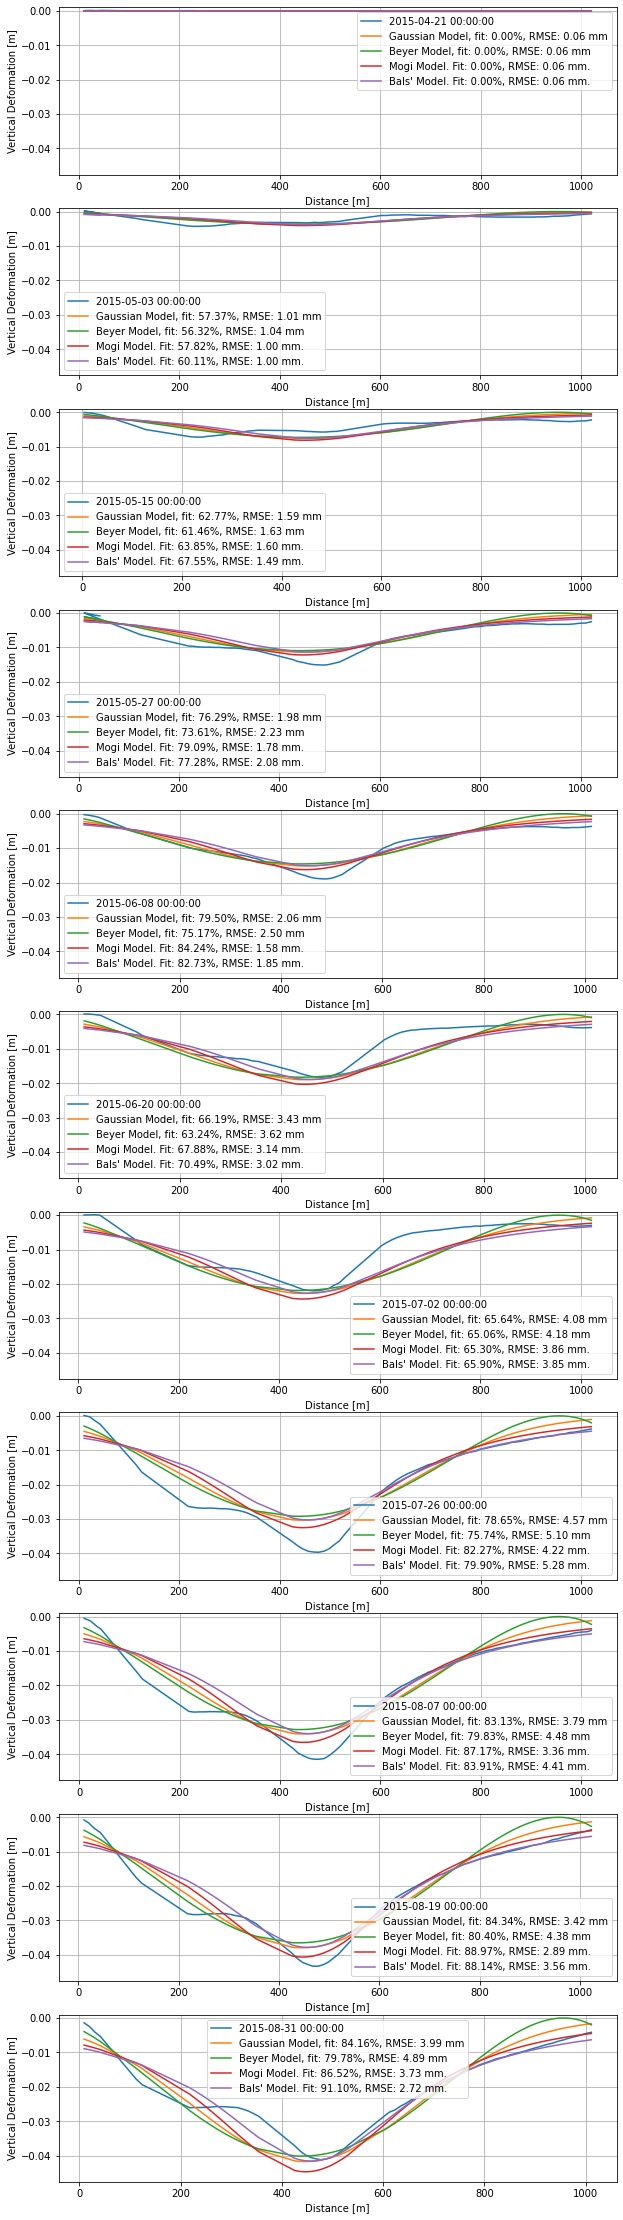

In [6]:
#plot the results

# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(nrows=nitems, figsize = (10,40))
zmin = min(data_list[-2][1]/100)
fit_list = np.zeros((5,nitems))
RMSE_list = np.zeros((5,nitems))

for i in range(nitems):
    #compute some parameters
    y_data = data_list[i][1].values/100 #from cm to meter
    x1 = data_list[i][0].values
#     r1 = np.sqrt((x1-x0_mogi)**2)
    z1 = np.zeros((len(x1)))
    
    #computing the gaussian model and fit
    stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
    y1 = stochastic_gv*delta_days[i]*gaussian(stochastic_gR,stochastic_r1)
    ehat = y_data - y1  
    gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[0,i] = gfit
    gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[0,i] = gaus_RMSE
    
    if i == 0:
        print(np.sum(abs(y_data)))
    
    #computing the beyer model and fit
    beyer_r1 = np.sqrt((x1-beyer_x0)**2)
    y2 = beyer_gv*delta_days[i]*beyer(beyer_gR,beyer_r1)
    ehat = y_data - y2
    beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[1,i] = beyer_fit
    beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[1,i] = beyer_RMSE
    
#     #computing the bals model and fit
#     sanns_r1 = np.sqrt((x1-sanns_x0)**2)
#     y3 = sanns_gv*delta_days[i]*sann(sanns_gR,sanns_r1)
#     ehat = y_data - y3
#     bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[2,i] = bals_fit
#     bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[2,i] = bals_RMSE
    
#     mogi model
    mogi_y = mogi_xhat*delta_days[i]*mogi(poisson,x1,z1,x0_mogi,z0_mogi).T
    ehat = y_data - mogi_y.T[0]
    mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    fit_list[3,i] = mogi_fit
    RMSE_list[3,i] = mogi_RMSE
    
    # bals' model
    bals_r1 = np.sqrt((x1-bals_x0)**2)
    y4 = bals_gv*delta_days[i]*bals_zg(bals_gR,bals_r1,bals_gTheta)
    ehat = y_data - y4
    bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[4,i] = bals1_fit
    bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[4,i] = bals1_RMSE
    
    #plotting the data
    ax[i].plot(x1,y_data,label=date_list[i])

    #plotting the gaussian model
    ax[i].plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE))  
    
    #plotting the beyer model
    ax[i].plot(x1,y2,label='Beyer Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(beyer_fit,beyer_RMSE))
    
    #plotting the beyer model
#     ax[i].plot(x1,y3,label='Sanns Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(bals_fit,bals_RMSE))
    
    #plot mogi model
    ax[i].plot(x1,mogi_y,label='Mogi Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(mogi_fit,mogi_RMSE))
    
    #bals function
    ax[i].plot(x1,y4,label='Bals\' Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(bals1_fit,bals1_RMSE))
    
    #Notations
    ax[i].grid(True)
    ax[i].set_xlabel('Distance [m]')
    ax[i].set_ylabel('Vertical Deformation [m]')
    ax[i].set_ylim(zmin*1.1,0.001)
#     ax[i].set_title('Model fit: {:.4f}'.format(fit))
    ax[i].legend()

#skip the first fit percentage
avg_gfit = np.sum(fit_list[0,1:])/(nitems)
avg_befit = np.sum(fit_list[1,1:])/(nitems)
avg_bafit = np.sum(fit_list[2,1:])/(nitems)
avg_mofit = np.sum(fit_list[3,1:])/(nitems)
avg_balsfit = np.sum(fit_list[4,1:])/(nitems)

avg_gRMSE = np.sum(RMSE_list[0,:])/(nitems-1)
avg_beRMSE = np.sum(RMSE_list[1,:])/(nitems-1)
avg_baRMSE = np.sum(RMSE_list[2,:])/(nitems-1)
avg_moRMSE = np.sum(RMSE_list[3,:])/(nitems-1)
avg_balsRMSE = np.sum(RMSE_list[4,:])/(nitems-1)

print('Gaussian Average Fit Percentage: {:.2f}%.'.format(avg_gfit))
print('Beyer Average Fit Percentage: {:.2f}%.'.format(avg_befit))                                                
print('Sanns Average Fit Percentage: {:.2f}%.'.format(avg_bafit))                                                
print('Mogi Average Fit Percentage: {:.2f}%.'.format(avg_mofit))    
print('Bals Average Fit Percentage: {:.2f}%.'.format(avg_balsfit)) 

print('Gaussian Average RMSE: {:.6f}.'.format(avg_gRMSE))
print('Beyer Average RMSE: {:.6f}.'.format(avg_beRMSE))                                                
print('Sanns Average RMSE: {:.6f}.'.format(avg_baRMSE))
print('Mogi Average RMSE: {:.6f}.'.format(avg_moRMSE))
print('Bals Average RMSE: {:.6f}.'.format(avg_balsRMSE))

avg_gRMSE = np.sum(RMSE_list[0,:])/(nitems)
avg_beRMSE = np.sum(RMSE_list[1,:])/(nitems)
avg_baRMSE = np.sum(RMSE_list[2,:])/(nitems)
avg_moRMSE = np.sum(RMSE_list[3,:])/(nitems)
avg_balsRMSE = np.sum(RMSE_list[4,:])/(nitems)

print('Gaussian Average RMSE: {:.6f}.'.format(avg_gRMSE))
print('Beyer Average RMSE: {:.6f}.'.format(avg_beRMSE))                                                
print('Sanns Average RMSE: {:.6f}.'.format(avg_baRMSE))
print('Mogi Average RMSE: {:.6f}.'.format(avg_moRMSE))
print('Bals Average RMSE: {:.6f}.'.format(avg_balsRMSE))

NameError: name 'x0' is not defined

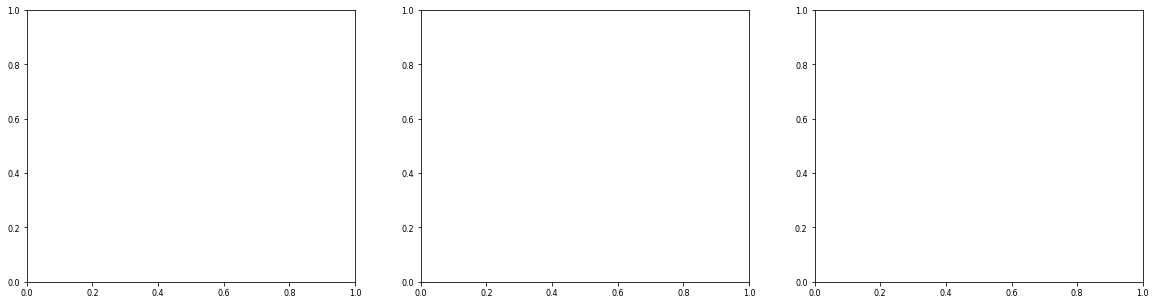

In [7]:
# #figure that only plots 3 figure in one single row
# nitems_list = [1,6,10]
# nitems = len(nitems_list)

# plt.rcParams.update({'font.size': 8})
# # plt.figure(figsize=(15,10))
# fig, ax = plt.subplots(nrows=1,ncols=3, figsize = (20,5))

# zmin = min(data_list[-2][1]/100)
# fit_list = np.zeros((5,nitems))
# RMSE_list = np.zeros((5,nitems))

# for i in range(nitems):
# #     i = nitems_list[i]
#     #compute some parameters
#     y_data = data_list[nitems_list[i]][1].values/100 #from cm to meter
#     x1 = data_list[nitems_list[i]][0].values
#     r1 = np.sqrt((x1-x0)**2)
#     z1 = np.zeros((len(x1)))
    
#     #computing the gaussian model and fit
#     stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
#     y1 = stochastic_gv*delta_days[nitems_list[i]]*gaussian(stochastic_gR,stochastic_r1)
#     ehat = y_data - y1
#     gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[0,i] = gfit
#     gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[0,i] = gaus_RMSE
    
#     #computing the beyer model and fit
#     beyer_r1 = np.sqrt((x1-beyer_x0)**2)
#     y2 = beyer_gv*delta_days[nitems_list[i]]*beyer(beyer_gR,beyer_r1)
#     ehat = y_data - y2
#     beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[1,i] = beyer_fit
#     beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[1,i] = beyer_RMSE
    
#     #computing the bals model and fit
#     sanns_r1 = np.sqrt((x1-sanns_x0)**2)
#     y3 = sanns_gv*delta_days[nitems_list[i]]*sann(sanns_gR,sanns_r1)
#     ehat = y_data - y3
#     bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[2,i] = bals_fit
#     bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[2,i] = bals_RMSE
    
# #     mogi model
#     mogi_y = mogi_xhat*delta_days[nitems_list[i]]*mogi(poisson,x1,z1,x0,z0).T
#     ehat = y_data - mogi_y.T
#     mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))[0][0]*1000
#     fit_list[3,i] = mogi_fit
#     RMSE_list[3,i] = mogi_RMSE
    
#     # bals' model
#     bals_r1 = np.sqrt((x1-bals_x0)**2)
#     y4 = bals_gv*delta_days[nitems_list[i]]*bals_zg(bals_gR,bals_r1,bals_gTheta)
#     ehat = y_data - y4
#     bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[4,i] = bals1_fit
#     bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[4,i] = bals1_RMSE

#     #plotting the data
#     ax[i].plot(x1,y_data,label=date_list[i],linewidth=3.0)
    
#     #plotting the gaussian model
#     ax[i].plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE),linestyle='dotted')  
    
#     #plotting the beyer model
#     ax[i].plot(x1,y2,label='Beyer Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(beyer_fit,beyer_RMSE),linestyle='dashed')
    
#     #plotting the beyer model
# #     ax[i].plot(x1,y3,label='Sanns Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(bals_fit,bals_RMSE))
    
#     #plot mogi model
#     ax[i].plot(x1,mogi_y,label='Mogi Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(mogi_fit,mogi_RMSE),linestyle='dashdot')
    
#     #bals function
#     ax[i].plot(x1,y4,label='Bals\' Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(bals1_fit,bals1_RMSE),linestyle='solid')
    

    
#     #Notations
#     ax[i].grid(True)
#     ax[i].set_xlabel('Distance [m]')
#     ax[i].set_ylabel('Vertical Deformation [m]')
#     ax[i].set_ylim(zmin*1.1,0.001)
# #     ax[i].set_title('Model fit: {:.4f}'.format(fit))
#     ax[i].legend()

# #skip the first fit percentage
# avg_gfit = np.sum(fit_list[0,1:])/(nitems-1)
# avg_befit = np.sum(fit_list[1,1:])/(nitems-1)
# avg_bafit = np.sum(fit_list[2,1:])/(nitems-1)
# avg_mofit = np.sum(fit_list[3,1:])/(nitems-1)
# avg_balsfit = np.sum(fit_list[4,1:])/(nitems-1)

# avg_gRMSE = np.sum(RMSE_list[0,:])/(nitems)
# avg_beRMSE = np.sum(RMSE_list[1,:])/(nitems)
# avg_baRMSE = np.sum(RMSE_list[2,:])/(nitems)
# avg_moRMSE = np.sum(RMSE_list[3,:])/(nitems)
# avg_balsRMSE = np.sum(RMSE_list[4,:])/(nitems)

In [ ]:
# #showing the incorrectness of the Sann's model
# #figure that only plots 3 figure in one single row
# nitems_list = [1,6,10]
# nitems = len(nitems_list)

# plt.rcParams.update({'font.size': 8})
# # plt.figure(figsize=(15,10))
# fig, ax = plt.subplots(nrows=1,ncols=3, figsize = (20,5))

# zmin = min(data_list[-2][1]/100)
# fit_list = np.zeros((5,nitems))
# RMSE_list = np.zeros((5,nitems))

# for i in range(nitems):
# #     i = nitems_list[i]
#     #compute some parameters
#     y_data = data_list[nitems_list[i]][1].values/100 #from cm to meter
#     x1 = data_list[nitems_list[i]][0].values
#     r1 = np.sqrt((x1-x0)**2)
#     z1 = np.zeros((len(x1)))
    
#     #computing the gaussian model and fit
#     stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
#     y1 = stochastic_gv*delta_days[nitems_list[i]]*gaussian(stochastic_gR,stochastic_r1)
#     ehat = y_data - y1
#     gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[0,i] = gfit
#     gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[0,i] = gaus_RMSE
    
#     #computing the beyer model and fit
#     beyer_r1 = np.sqrt((x1-beyer_x0)**2)
#     y2 = beyer_gv*delta_days[nitems_list[i]]*beyer(beyer_gR,beyer_r1)
#     ehat = y_data - y2
#     beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[1,i] = beyer_fit
#     beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[1,i] = beyer_RMSE
    
#     #computing the bals model and fit
#     sanns_r1 = np.sqrt((x1-sanns_x0)**2)
#     y3 = sanns_gv*delta_days[nitems_list[i]]*sann(sanns_gR,sanns_r1)
#     ehat = y_data - y3
#     bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[2,i] = bals_fit
#     bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[2,i] = bals_RMSE
    
# #     mogi model
#     mogi_y = mogi_xhat*delta_days[nitems_list[i]]*mogi(poisson,x1,z1,x0_mogi,z0_mogi).T
#     ehat = y_data - mogi_y.T[0]
#     mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     fit_list[3,i] = mogi_fit
#     RMSE_list[3,i] = mogi_RMSE
    
#     # bals' model
#     bals_r1 = np.sqrt((x1-bals_x0)**2)
#     y4 = bals_gv*delta_days[nitems_list[i]]*bals_zg(bals_gR,bals_r1,bals_gTheta)
#     ehat = y_data - y4
#     bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[4,i] = bals1_fit
#     bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[4,i] = bals1_RMSE

#     #plotting the data
#     ax[i].plot(x1,y_data,label=date_list[i],linewidth=3.0)
    
#     #plotting the gaussian model
#     ax[i].plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE),linestyle='dotted')  
    
#     #plotting the beyer model
# #     ax[i].plot(x1,y2,label='Beyer Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(beyer_fit,beyer_RMSE),linestyle='dashed')
    
#     #plotting the beyer model
#     ax[i].plot(x1,y3,label='Sanns Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(bals_fit,bals_RMSE))
    
#     #plot mogi model
# #     ax[i].plot(x1,mogi_y,label='Mogi Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(mogi_fit,mogi_RMSE),linestyle='dashdot')
    
#     #bals function
# #     ax[i].plot(x1,y4,label='Bals\' Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(bals1_fit,bals1_RMSE),linestyle='solid')
    

    
#     #Notations
#     ax[i].grid(True)
#     ax[i].set_xlabel('Distance [m]')
#     ax[i].set_ylabel('Vertical Deformation [m]')
#     ax[i].set_ylim(zmin*1.1,0.001)
# #     ax[i].set_title('Model fit: {:.4f}'.format(fit))
#     ax[i].legend()

# #skip the first fit percentage
# avg_gfit = np.sum(fit_list[0,1:])/(nitems-1)
# avg_befit = np.sum(fit_list[1,1:])/(nitems-1)
# avg_bafit = np.sum(fit_list[2,1:])/(nitems-1)
# avg_mofit = np.sum(fit_list[3,1:])/(nitems-1)
# avg_balsfit = np.sum(fit_list[4,1:])/(nitems-1)

# avg_gRMSE = np.sum(RMSE_list[0,:])/(nitems)
# avg_beRMSE = np.sum(RMSE_list[1,:])/(nitems)
# avg_baRMSE = np.sum(RMSE_list[2,:])/(nitems)
# avg_moRMSE = np.sum(RMSE_list[3,:])/(nitems)
# avg_balsRMSE = np.sum(RMSE_list[4,:])/(nitems)

# Implement SNR into the plots

In [8]:
def get_snr(obs,adj_obs):
    ehat = np.abs(obs - adj_obs)
    SNR = np.abs(adj_obs)/ehat
    return 10*np.log10(SNR)

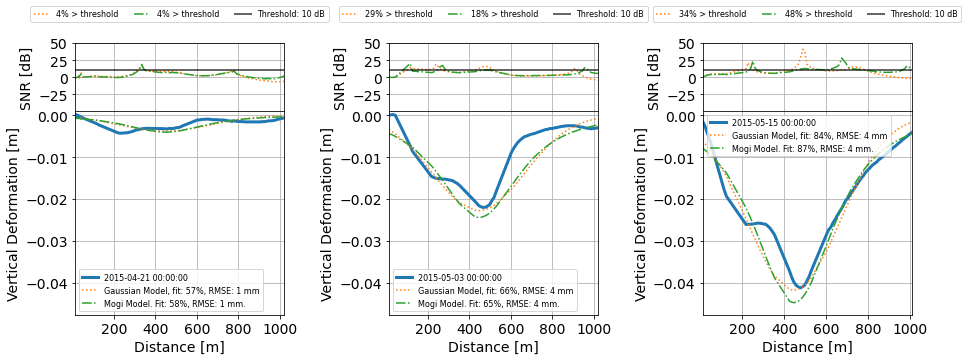

In [9]:
#creating the figure outline
# fig = plt.figure(figsize=(20,5))
fig = plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 14})
spec = plt.GridSpec(4,3,hspace=0,wspace=0.5)

ax_tl = fig.add_subplot(spec[0, 0],xticklabels=[])
ax_bl = fig.add_subplot(spec[1:, 0])
ax_tm = fig.add_subplot(spec[0, 1],xticklabels=[])
ax_bm = fig.add_subplot(spec[1:, 1])
ax_tr = fig.add_subplot(spec[0, 2],xticklabels=[])
ax_br = fig.add_subplot(spec[1:, 2])

axes_list = [(ax_tl,ax_bl),(ax_tm,ax_bm),(ax_tr,ax_br)]

#figure standard variables
threshold = 10
nitems_list = [1,6,10]
nitems = len(nitems_list)
plt.rcParams.update({'font.size': 8})
zmin = min(data_list[-2][1]/100)
fit_list = np.zeros((5,nitems))
RMSE_list = np.zeros((5,nitems))

for i in range(nitems):
    y_data = data_list[nitems_list[i]][1].values/100 #from cm to meter
    x1 = data_list[nitems_list[i]][0].values
#     r1 = np.sqrt((x1-x0)**2)
    z1 = np.zeros((len(x1)))
     
    #computing the gaussian model and fit
    stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
    y1 = stochastic_gv*delta_days[nitems_list[i]]*gaussian(stochastic_gR,stochastic_r1)
    ehat = y_data - y1
    gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[0,i] = gfit
    gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[0,i] = gaus_RMSE
    
    #computing the beyer model and fit
    beyer_r1 = np.sqrt((x1-beyer_x0)**2)
    y2 = beyer_gv*delta_days[nitems_list[i]]*beyer(beyer_gR,beyer_r1)
    ehat = y_data - y2
    beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[1,i] = beyer_fit
    beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[1,i] = beyer_RMSE
    
    #computing the bals model and fit
    sanns_r1 = np.sqrt((x1-sanns_x0)**2)
    y3 = sanns_gv*delta_days[nitems_list[i]]*sann(sanns_gR,sanns_r1)
    ehat = y_data - y3
    bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[2,i] = bals_fit
    bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[2,i] = bals_RMSE
    
    #mogi model
    mogi_y = mogi_xhat*delta_days[nitems_list[i]]*mogi(poisson,x1,z1,x0_mogi,z0_mogi).T
    ehat = y_data - mogi_y.T[0]
    mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    fit_list[3,i] = mogi_fit
    RMSE_list[3,i] = mogi_RMSE
    
    # bals' model
    bals_r1 = np.sqrt((x1-bals_x0)**2)
    y4 = bals_gv*delta_days[nitems_list[i]]*bals_zg(bals_gR,bals_r1,bals_gTheta)
    ehat = y_data - y4
    bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[4,i] = bals1_fit
    bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[4,i] = bals1_RMSE
    
    #plotting the models in the figures
    #plotting the data
    axes_list[i][1].plot(x1,y_data,label=date_list[i],linewidth=3.0)
    
    #plotting the gaussian model
    gauss_fig = axes_list[i][1].plot(x1,y1,label='Gaussian Model, fit: {:.0f}%, RMSE: {:.0f} mm'.format(gfit,gaus_RMSE),linestyle='dotted')  
    
    #plotting the beyer model
#     beyer_fig = axes_list[i][1].plot(x1,y2,label='Beyer Model, fit: {:.0f}%, RMSE: {:.0f} mm'.format(beyer_fit,beyer_RMSE),linestyle='dashed')
    
    #plot mogi model
    mogi_fig = axes_list[i][1].plot(x1,mogi_y,label='Mogi Model. Fit: {:.0f}%, RMSE: {:.0f} mm.'.format(mogi_fit,mogi_RMSE),linestyle='dashdot')
    
    #bals function
#     bals_fig = axes_list[i][1].plot(x1,y4,label='Bals\' Model. Fit: {:.0f}%, RMSE: {:.0f} mm.'.format(bals1_fit,bals1_RMSE),linestyle='solid')
    
    #Notations
    axes_list[i][1].grid(True)
    axes_list[i][1].set_xlim([min(x1),max(x1)])
    axes_list[i][1].set_xlabel('Distance [m]')
    axes_list[i][1].set_ylabel('Vertical Deformation [m]')
    axes_list[i][1].set_ylim(zmin*1.1,0.001)
    axes_list[i][1].legend()
    
    #add SNR figure
    snr_gauss = get_snr(y_data,y1)
    snr_beyer = get_snr(y_data,y2)
    snr_mogi = get_snr(y_data,mogi_y.T[0])
    snr_bals = get_snr(y_data,y4)

    #check percentage above the threshold
    above_threshold_gauss = snr_gauss>threshold
    above_threshold_beyer = snr_beyer>threshold
    above_threshold_mogi = snr_mogi>threshold
    above_threshold_bals = snr_bals>threshold

    #notations snr figure
    gauss_perc = np.sum(above_threshold_gauss)/len(snr_gauss)
    beyer_perc = np.sum(above_threshold_beyer)/len(snr_beyer)
    mogi_perc = np.sum(above_threshold_mogi)/len(snr_mogi)
    bals_perc = np.sum(above_threshold_bals)/len(snr_bals)
    
    axes_list[i][0].plot(x1,snr_gauss,c=gauss_fig[0].get_color(),linestyle='dotted',label='{:.0f}% > threshold'.format(gauss_perc*100))
#     axes_list[i][0].plot(x1,snr_beyer,c=beyer_fig[0].get_color(),linestyle='dashed',label='{:.0f}% > threshold'.format(beyer_perc*100))
    axes_list[i][0].plot(x1,snr_mogi,c=mogi_fig[0].get_color(),linestyle='dashdot',label='{:.0f}% > threshold'.format(mogi_perc*100))
#     axes_list[i][0].plot(x1,snr_bals,c=bals_fig[0].get_color(),label='{:.0f}% > threshold'.format(bals_perc*100))
    axes_list[i][0].plot(x1,[threshold for _ in range(len(x1))],c='k',linewidth=2,label='Threshold: {:.0f} dB'.format(threshold),alpha=0.6)
    
    axes_list[i][0].set_ylim([-49.1,50])
    axes_list[i][0].legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.6))
    axes_list[i][0].grid(True)
    axes_list[i][0].set_xlim([min(x1),max(x1)])
    axes_list[i][0].set_ylabel('SNR [dB]')

In [10]:
fig.savefig('Wink2016_Results_Thesis_zonder11.png')